# **Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# **Import Dataset**

In [ ]:
loanDF = pd.read_csv('https://raw.githubusercontent.com/RizkiYanuar-Tech/Submission_ML_Terapan/refs/heads/main/loan_data.csv')

In [ ]:
loanDF

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
loanDF.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## **Data visualization**

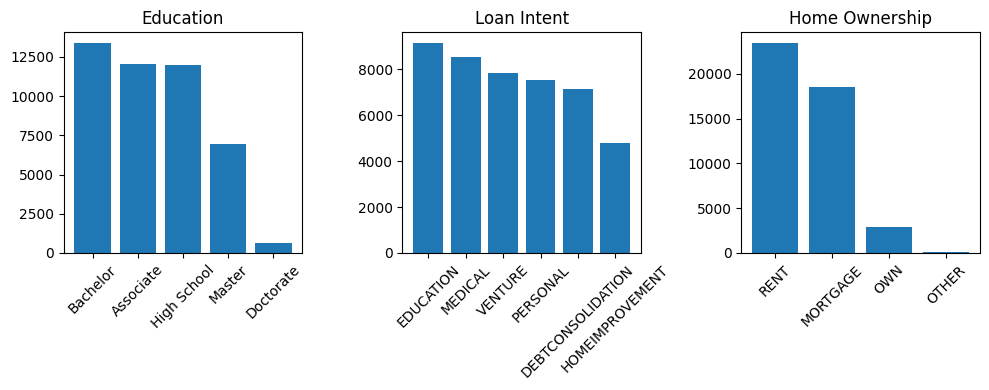

In [ ]:
plt.figure(figsize=(10, 4))  # Tambahkan ukuran figure agar tidak dempet

# Subplot 1 - Education
plt.subplot(1, 3, 1)
plt.bar(loanDF['person_education'].value_counts().index,
        loanDF['person_education'].value_counts())
plt.title("Education")
plt.xticks(rotation=45)

# Subplot 2 - Loan Intent
plt.subplot(1, 3, 2)
plt.bar(loanDF['loan_intent'].value_counts().index,
        loanDF['loan_intent'].value_counts())
plt.title("Loan Intent")
plt.xticks(rotation=45)

# Subplot 3 - Home Ownership
plt.subplot(1, 3, 3)
plt.bar(loanDF['person_home_ownership'].value_counts().index,
        loanDF['person_home_ownership'].value_counts())
plt.title("Home Ownership")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **Data Preprocessing**

### **Encoding**

In [ ]:
OH = OneHotEncoder(sparse_output=False, categories=[['female','male']])

loanDF['person_gender'] = OH.fit_transform(loanDF[['person_gender']])

In [ ]:
le = LabelEncoder()

loanDF['person_education'] = le.fit_transform(loanDF['person_education'])
loanDF['person_home_ownership'] = le.fit_transform(loanDF['person_home_ownership'])
loanDF['loan_intent'] = le.fit_transform(loanDF['loan_intent'])
loanDF['previous_loan_defaults_on_file'] = le.fit_transform(loanDF['previous_loan_defaults_on_file'])

In [ ]:
loanDF.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1.0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,1.0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,1.0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,1.0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,0.0,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


### **Check Outliers**

<Axes: title={'center': 'Outlier loan_amnt'}, xlabel='loan_amnt'>

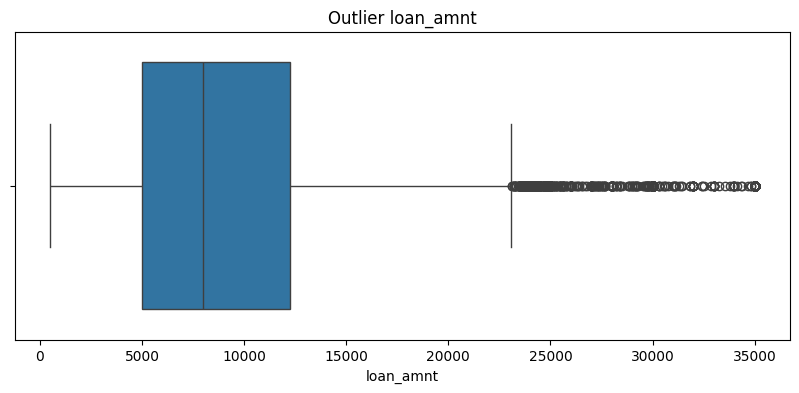

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier loan_amnt")
sns.boxplot(data=loanDF, x='loan_amnt')

<Axes: title={'center': 'Outlier loan_int_rate'}, xlabel='loan_int_rate'>

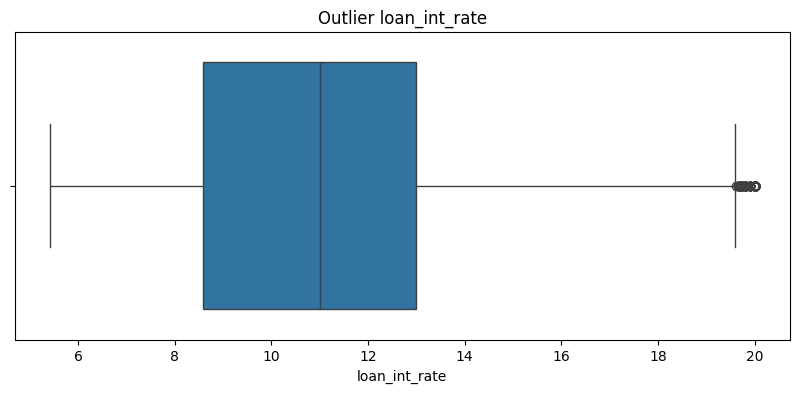

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier loan_int_rate")
sns.boxplot(data=loanDF, x='loan_int_rate')

<Axes: title={'center': 'Outlier loan_percent_income'}, xlabel='loan_percent_income'>

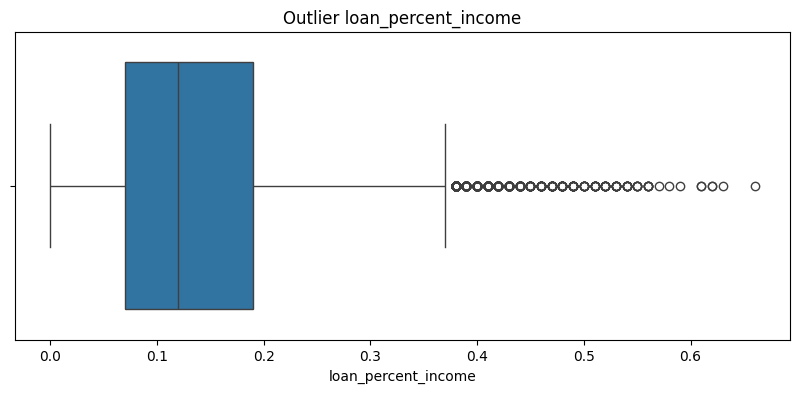

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier loan_percent_income")
sns.boxplot(data=loanDF, x='loan_percent_income')

<Axes: title={'center': 'Outlier Credit_Score'}, xlabel='credit_score'>

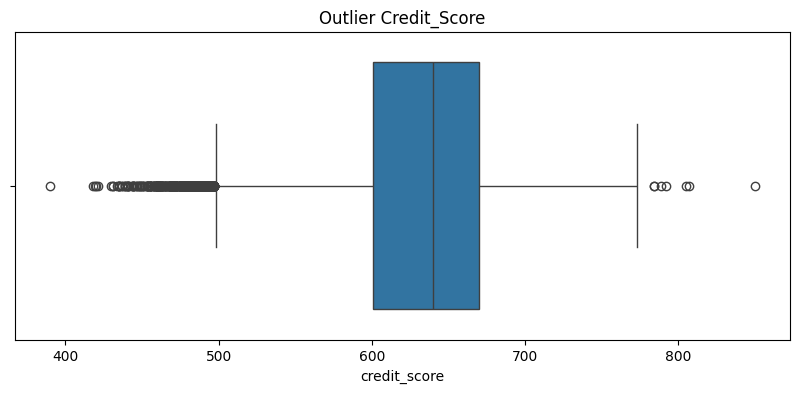

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier Credit_Score")
sns.boxplot(data=loanDF, x='credit_score')

### **Analisa**

Pada dataset tidak ditemukan adanya missing value ataupun duplikat data, kemudian dilakukan encoding kepada label kategorik, sehingga model dapat memahami isi data melalui bentuk numerik. Kemudian dilakukan pengecheckan outlier pada data, karena jika outlier dibiarkan bisa mempengaruhi kinerja model



# **Data Cleaning**

### **Cleaning Outliers**

In [ ]:
Q1 = loanDF['loan_amnt'].quantile(0.25)
Q3 = loanDF['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

loanDF = loanDF[(loanDF['loan_amnt'] >= lower_bound) & (loanDF['loan_amnt'] <= upper_bound)]

<Axes: title={'center': 'Outlier loan_amnt'}, xlabel='loan_amnt'>

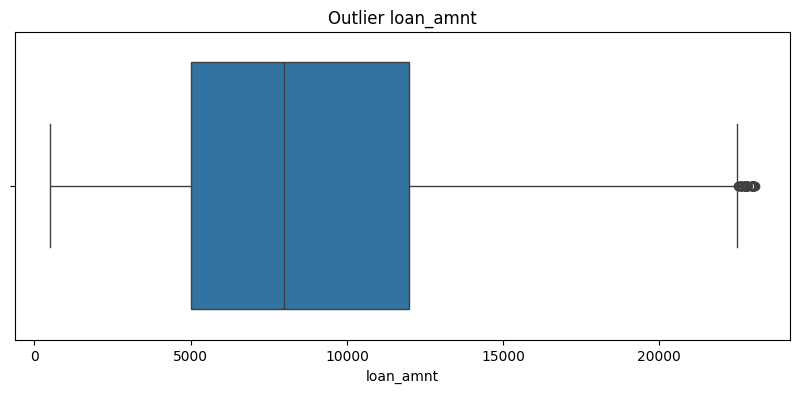

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier loan_amnt")
sns.boxplot(data=loanDF, x='loan_amnt')

In [ ]:
Q1 = loanDF['loan_int_rate'].quantile(0.25)
Q3 = loanDF['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

loanDF = loanDF[(loanDF['loan_int_rate'] >= lower_bound) & (loanDF['loan_int_rate'] <= upper_bound)]

<Axes: title={'center': 'Outlier loan_int_rate'}, xlabel='loan_int_rate'>

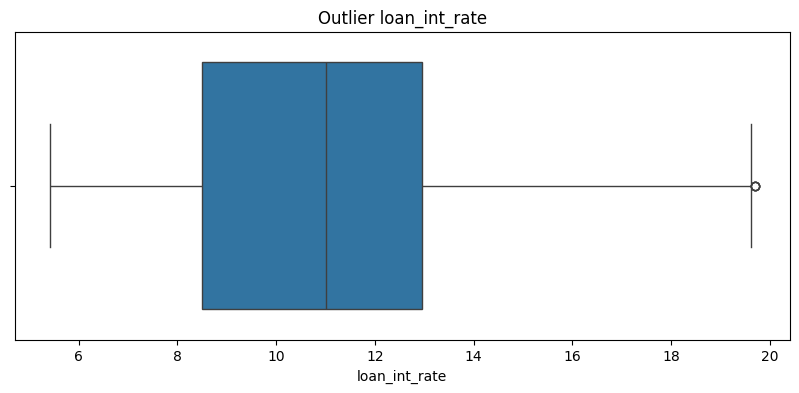

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier loan_int_rate")
sns.boxplot(data=loanDF, x='loan_int_rate')

In [ ]:
Q1 = loanDF['loan_percent_income'].quantile(0.25)
Q3 = loanDF['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

loanDF = loanDF[(loanDF['loan_percent_income'] >= lower_bound) & (loanDF['loan_percent_income'] <= upper_bound)]

<Axes: title={'center': 'Outlier loan_percent_income'}, xlabel='loan_percent_income'>

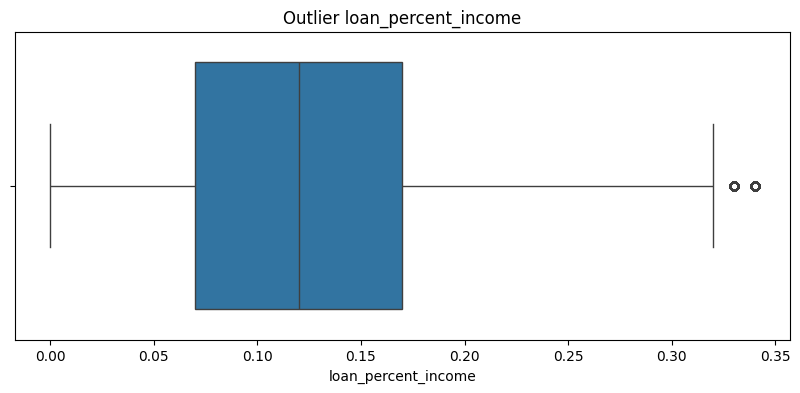

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier loan_percent_income")
sns.boxplot(data=loanDF, x='loan_percent_income')

In [ ]:
Q1 = loanDF['credit_score'].quantile(0.25)
Q3 = loanDF['credit_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

loanDF = loanDF[(loanDF['credit_score'] >= lower_bound) & (loanDF['credit_score'] <= upper_bound)]

<Axes: title={'center': 'Outlier credit_score'}, xlabel='credit_score'>

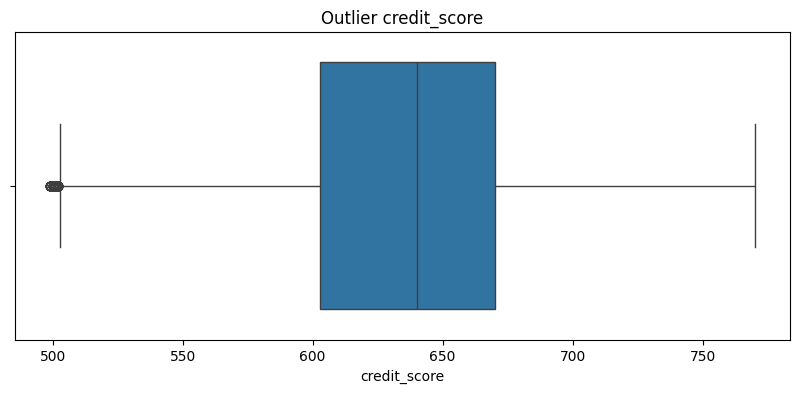

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Outlier credit_score")
sns.boxplot(data=loanDF, x='credit_score')

## **Analisa**

Dilakukan pembersihan data outlier pada kolom numerik menggunakan teknik capping, dimana nilai yang melebihi batas atas, dan batas bawah akan diubah sesuai dengan nilai di batas atas dan batas bawah

# **Bivariate Analysis**

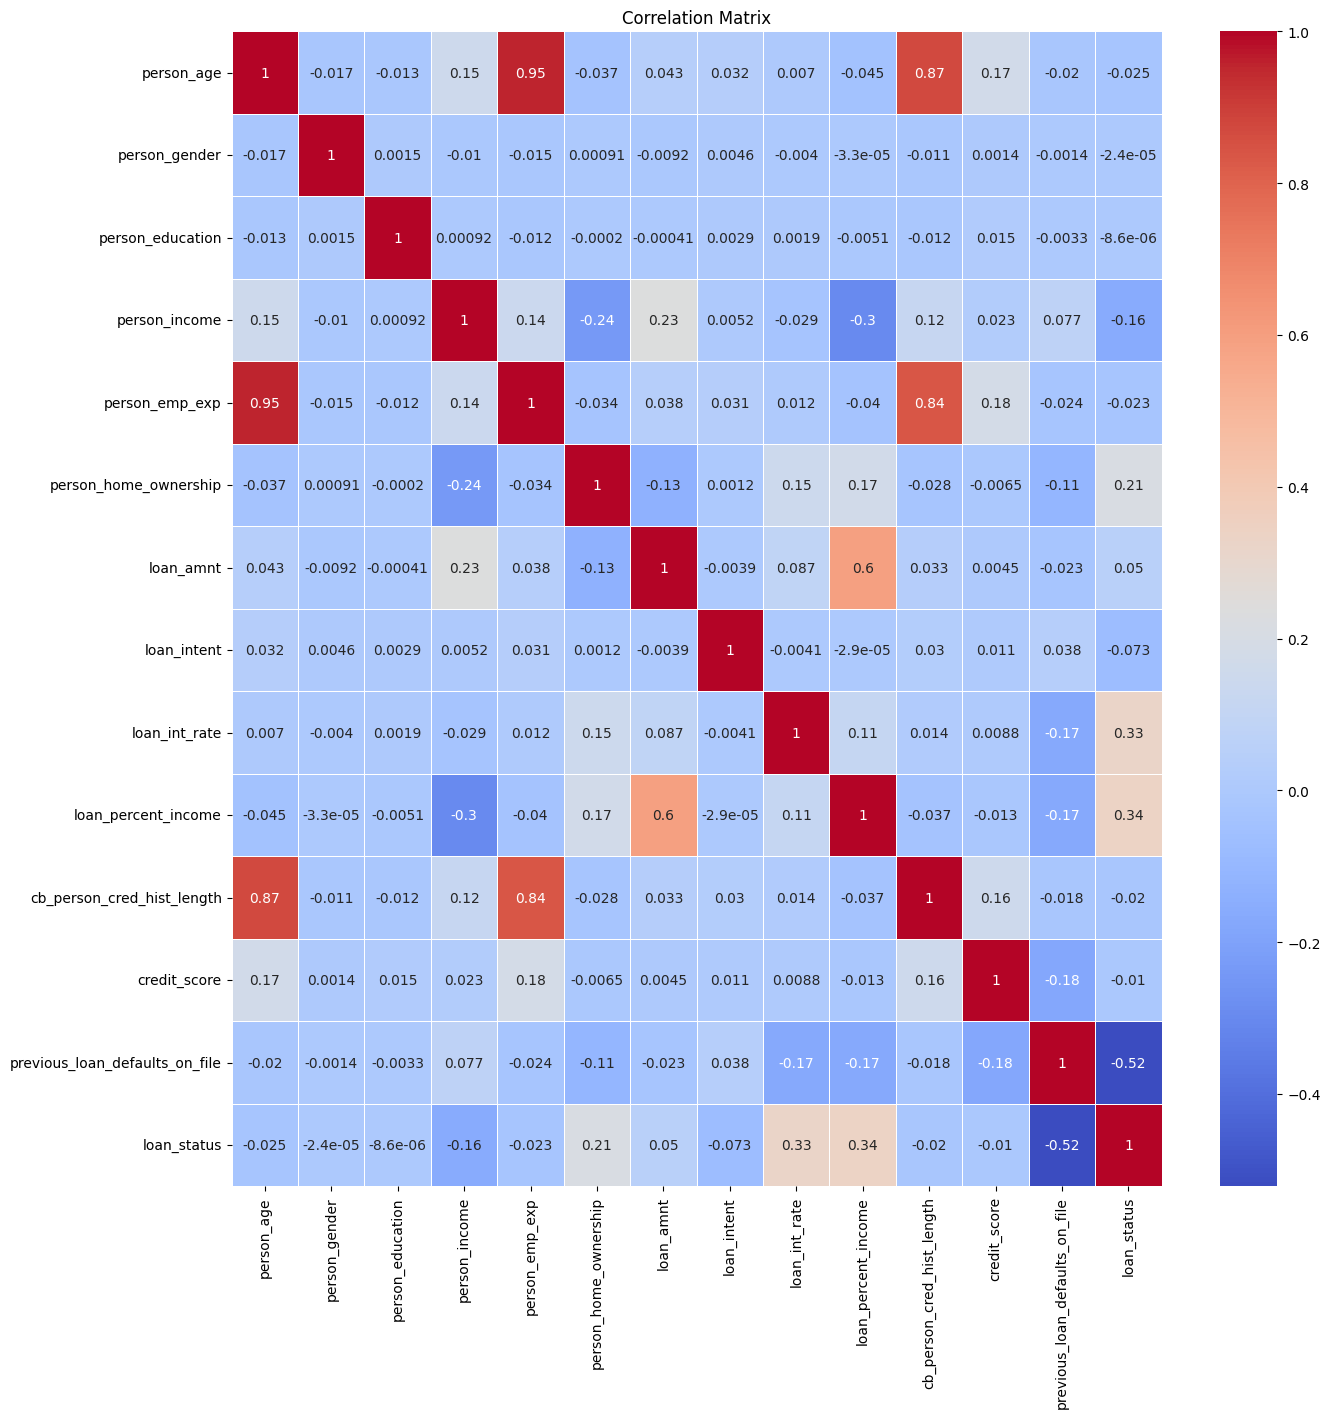

In [ ]:
numeric_loanDF = loanDF.select_dtypes(include=['int64','float64'])

correlation_matrix = numeric_loanDF.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Analisa**

Ditemukan bahwa terdapat hubungan sangat kuat antara **lama riwayat kredit** dan **juga umur pengguna**, hubungan antara **lama riwayat kredit** dan juga **pengalaman bekerja**, kemudian hubungan antara **pengalaman bekerja** dan **umur**. Kemudian terdapat hubungan cukup kuat antara **persentase jumlah pinjaman** dengan **total pinjaman yang diminta**

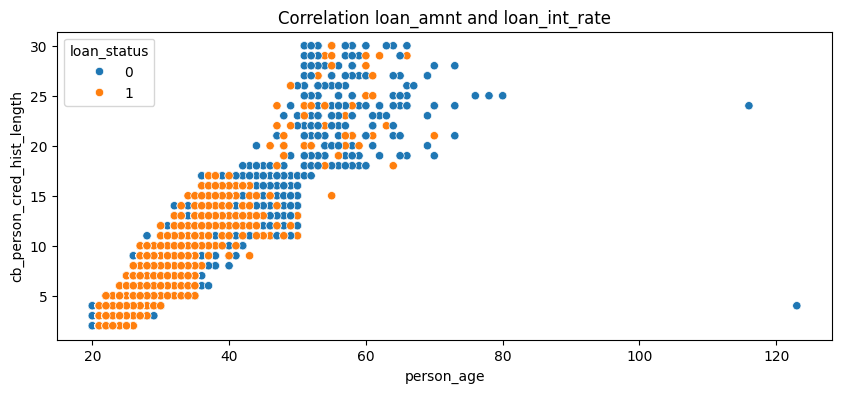

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Correlation loan_amnt and loan_int_rate")
sns.scatterplot(data=loanDF, x='person_age', y='cb_person_cred_hist_length', hue='loan_status')
plt.show()

**Analisa**

Ada korelasi positif yang jelas antara usia dan lama riwayat kredit, dimana peminjam dengan rentang usia 30-60 tahun yang memiliki lama histori kredit yang sedang cenderung memiliki peluang disetujui pinjaman lebih besar

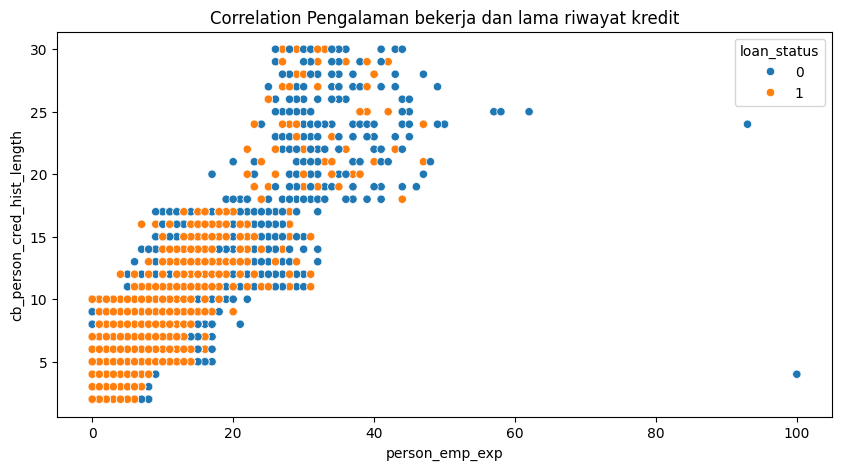

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Correlation Pengalaman bekerja dan lama riwayat kredit")
sns.scatterplot(data=loanDF, x='person_emp_exp', y='cb_person_cred_hist_length', hue='loan_status')
plt.show()

**Analisa**

Terdapat korelasi positif dimana orang yang memiliki pengalaman bekerja lebih lama cenderung memiliki riwayat kredit yang lama, orang yang memiliki pengalaman bekerja dengan rentang 0 - 25 tahun dan memiliki riwayat kredit dengan rentang 10 - 25 tahun cenderung memiliki peluang disetujui lebih besar

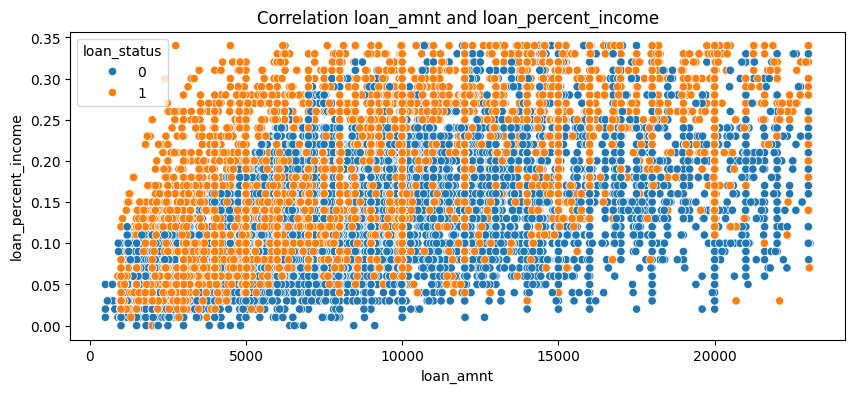

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Correlation loan_amnt and loan_percent_income")
sns.scatterplot(data=loanDF, x='loan_amnt', y='loan_percent_income', hue='loan_status')
plt.show()

**Analisa**

Tidak ditemukan korelasi yang kuat antara jumlah pinjaman dengan persentase pendapatan, tetapi disimpulkan bahwa peminjaman disetujui jika pinjaman yang diajukan jumlahnya tidak terlalu besar dibandingkan pendapatan orang tersebut

# **Splitting Dataset**

In [ ]:
X = loanDF.drop('loan_status', axis=1)
Y = loanDF['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **Analisa**

Dilakukan pembagian dataset menjadi data train dan test dengan proporsi 80:20

# **Model Klasifikasi**

## **RandomForest**

In [ ]:
#Inisialisasi Model
rf_classifier = RandomForestClassifier(random_state=42)

#Train_Model
rf_classifier.fit(X_train, y_train)

#Prediksi pada data test
y_pred_rf = rf_classifier.predict(X_test)

## **GradientBoosting**

In [ ]:
#Inisialisasi Model
gb_classifier = GradientBoostingClassifier(random_state=42)

#Train_Model
gb_classifier.fit(X_train, y_train)

#Prediksi data test
y_pred_gb = gb_classifier.predict(X_test)

## **Evaluasi Model**

### **Random Forest**

In [ ]:
accuracy_train = accuracy_score(y_train, rf_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, rf_classifier.predict(X_test))

print(f"Akurasi pada data train: {accuracy_train}")
print(f"Akurasi pada data test: {accuracy_test}")

print("\nClassification Report pada Data Test:")
print(classification_report(y_test, y_pred_rf))

Akurasi pada data train: 1.0
Akurasi pada data test: 0.9257281553398058

Classification Report pada Data Test:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6612
           1       0.86      0.74      0.80      1628

    accuracy                           0.93      8240
   macro avg       0.90      0.86      0.88      8240
weighted avg       0.92      0.93      0.92      8240



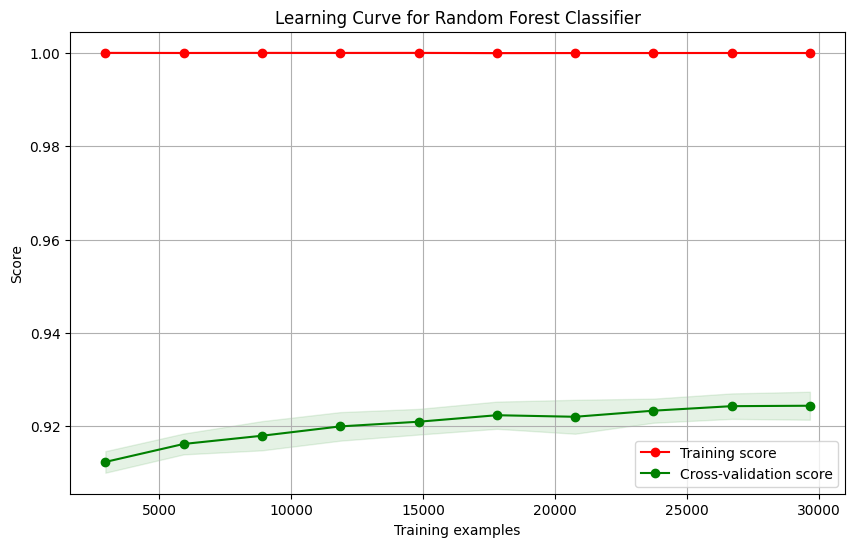

In [ ]:
# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    rf_classifier, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Random Forest Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

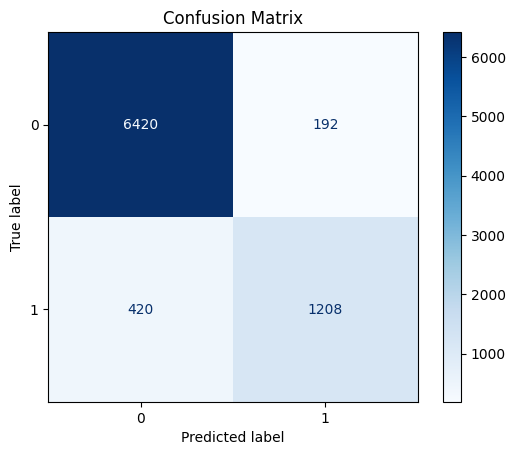

In [ ]:
# Melatih model RandomForest
rf_classifier.fit(X_train, y_train)

# Memprediksi kelas menggunakan model RandomForest
y_test_predict = rf_classifier.predict(X_test)

# Inisialisasi confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

# Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## **Analisa**

Didapatkan confusion matrix pada model random forest:
- 6420 data True Negative yang berarti 6420 peminjam akan ditolak untuk diberikan pinjaman

- 1208 data True Positive berarti 1208 peminjam akan di approve untuk diberikan pinjaman

- 420 data False Negative berarti 420 orang ditolak untuk diberikan pinjaman yang sebenarnya layak untuk diberikan pinjaman

- 192 data Fale Positive berarti 192 orang yang diberikan pinjaman padahal sebenarnya tidak layak diberikan pinjaman

### **Gradient Boosting**

In [ ]:
accuracy_train = accuracy_score(y_train, gb_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, gb_classifier.predict(X_test))

print(f"Akurasi pada data train: {accuracy_train}")
print(f"Akurasi pada data test: {accuracy_test}")

print("\nClassification Report pada Data Test:")
print(classification_report(y_test, y_pred_rf))

Akurasi pada data train: 0.922077922077922
Akurasi pada data test: 0.9226941747572815

Classification Report pada Data Test:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6612
           1       0.86      0.74      0.80      1628

    accuracy                           0.93      8240
   macro avg       0.90      0.86      0.88      8240
weighted avg       0.92      0.93      0.92      8240



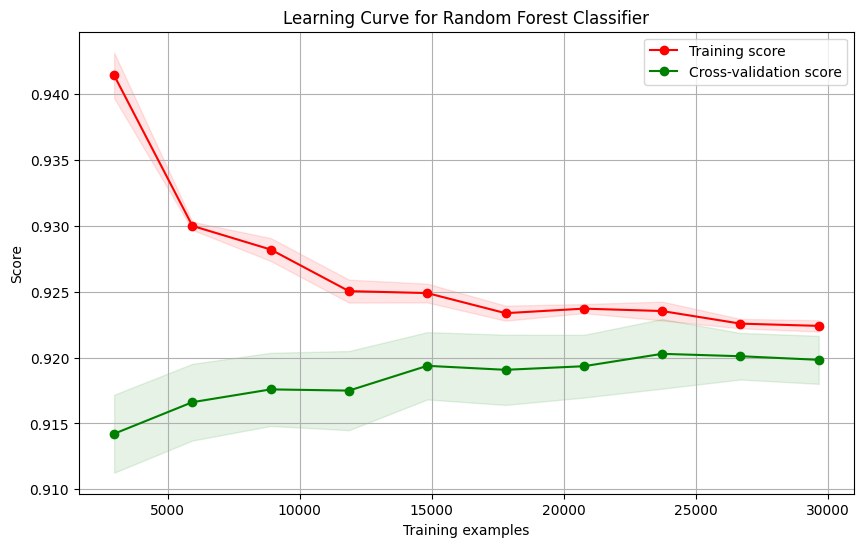

In [ ]:
# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    gb_classifier, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Random Forest Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

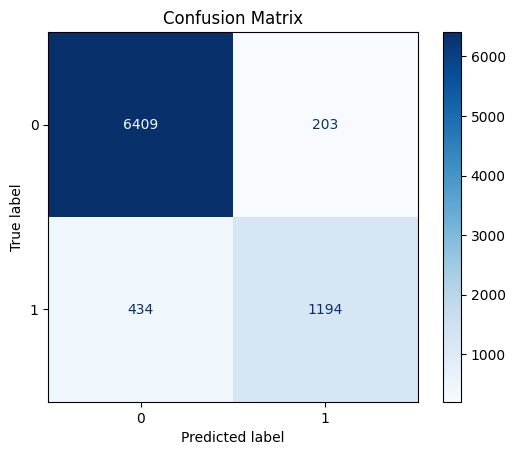

In [ ]:
# Melatih model DecisionTree
gb_classifier.fit(X_train, y_train)

# Memprediksi kelas menggunakan model DecisionTree
y_test_predict = gb_classifier.predict(X_test)

# Inisialisasi confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

# Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## **Analisa**

Didapatkan confusion matrix pada model Gradient Boosting:
- 6409 data True Negative yang berarti 6409 peminjam akan ditolak untuk diberikan pinjaman

- 1194 data True Positive berarti 1194 peminjam akan di approve untuk diberikan pinjaman

- 434 data False Negative berarti 434 orang ditolak untuk diberikan pinjaman yang sebenarnya layak untuk diberikan pinjaman

- 203 data Fale Positive berarti 203 orang yang diberikan pinjaman padahal sebenarnya tidak layak diberikan pinjaman

## **Hyperparameter**

### **Random Forest**

In [ ]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

#Inisialiasi Model Baru
rf_classifier = RandomForestClassifier(random_state=42)

#RandomSearchCV untuk tuning
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, scoring='accuracy', cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)

#Parameter terbaik
best_params = random_search.best_params_
print("Parameter terbaik: ", best_params)

Parameter terbaik:  {'n_estimators': 200, 'max_depth': 20, 'criterion': 'log_loss'}


In [ ]:
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)
rf_test = best_rf.predict(X_test)

#Akurasi
accuracy = accuracy_score(y_test, rf_test)
print(f"Akurasi pada data test: {accuracy}")

#Classification Report
print("\nClassification Report pada Data Test:")
print(classification_report(y_test, rf_test))

Akurasi pada data test: 0.9268203883495145

Classification Report pada Data Test:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6612
           1       0.87      0.74      0.80      1628

    accuracy                           0.93      8240
   macro avg       0.90      0.86      0.88      8240
weighted avg       0.92      0.93      0.92      8240



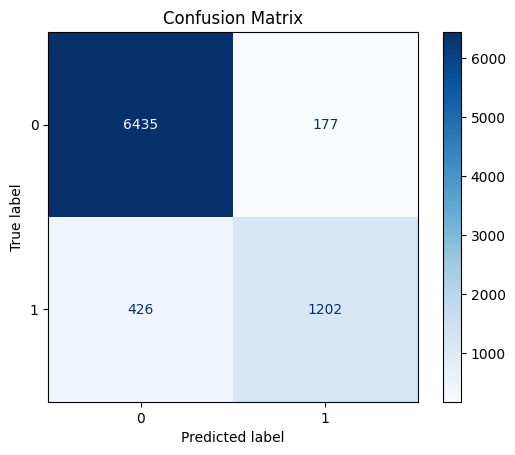

In [ ]:
# Melatih model DecisionTree
best_rf.fit(X_train, y_train)

# Memprediksi kelas menggunakan model DecisionTree
y_test_predict = best_rf.predict(X_test)

# Inisialisasi confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

# Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## **Analisa**

- 6435 True Negative, 6436 orang akan ditolak melakukan pinjaman

- 1202 True Positive, 1202 orang akan diterima untuk melakukan pinjaman

- 426 False Negative, 426 orang seharusnya layak mendapatkan pinjaman tetapi model menyatakan tidak layak

- 177 False Positive, 177 orang seharusnya ditolak dalam peminjaman, tetapi model memprediksi untuk layak diberikan pinjaman

### **Gradient Boosting**

In [ ]:
params_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
}

#Inisialisasi Model Baru
gb_classifier = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=params_grid, scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

#Parameter terbaik
best_params = random_search.best_params_

print("Parameter terbaik: ", best_params)

Parameter terbaik:  {'n_estimators': 200, 'max_depth': 20, 'loss': 'log_loss', 'learning_rate': 0.1}


In [ ]:
best_gb = GradientBoostingClassifier(random_state=42, **best_params)
best_gb.fit(X_train, y_train)
gb_test = best_gb.predict(X_test)

#Akurasi
accuracy = accuracy_score(y_test, gb_test)
print(f"Akurasi pada data test: {accuracy}")

#Classification Report
print("\nClassification Report pada Data Test:")
print(classification_report(y_test, gb_test))

Akurasi pada data test: 0.9240291262135922

Classification Report pada Data Test:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6612
           1       0.85      0.75      0.80      1628

    accuracy                           0.92      8240
   macro avg       0.89      0.86      0.87      8240
weighted avg       0.92      0.92      0.92      8240

